In [2]:
#202331004 Moh Fahrul Gibran
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#202331004 Moh Fahrul Gibran
image = cv2.imread('parkiran.jpg')
image.shape

(799, 1200, 3)

Text(0.5, 1.0, 'GRAY')

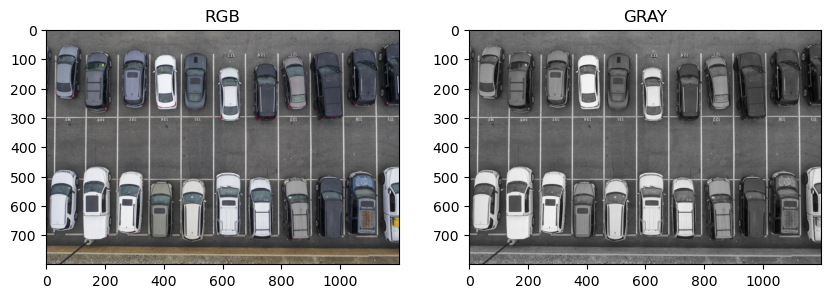

In [5]:
#202331004 Moh Fahrul Gibran
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs.ravel()

ax[0].imshow(image)
ax[0].set_title("RGB")

ax[1].imshow(img_gray,cmap = 'gray')
ax[1].set_title("GRAY")

In [7]:
#202331004 Moh Fahrul Gibran
edges = cv2.Canny(image, 100, 150)

Text(0.5, 1.0, 'EDGS')

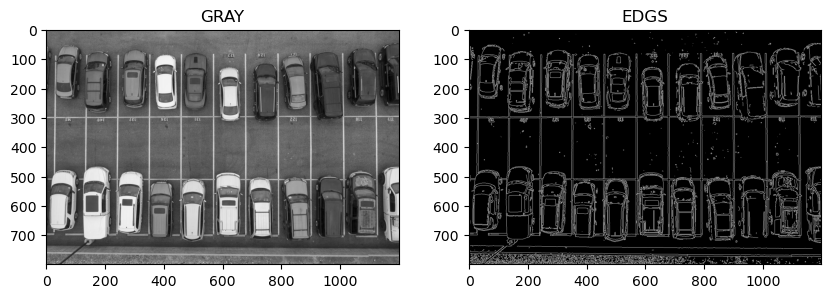

In [8]:
#202331004 Moh Fahrul Gibran
fig, axs = plt.subplots(1,2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(img_gray,cmap = 'gray')
ax[0].set_title("GRAY")

ax[1].imshow(edges, cmap = 'gray')
ax[1].set_title("EDGS")

In [11]:
#202331004 Moh Fahrul Gibran
lines = cv2.HoughLinesP(edges,1,np.pi/180,90, maxLineGap=150)
img_line = image.copy()

In [12]:
#202331004 Moh Fahrul Gibran
for line in lines :
        x1,y1,x2,y2 = line[0]
        cv2.line(img_line, (x1,y1), (x2,y2), (100,80,255),1)

Text(0.5, 1.0, 'EDGES')

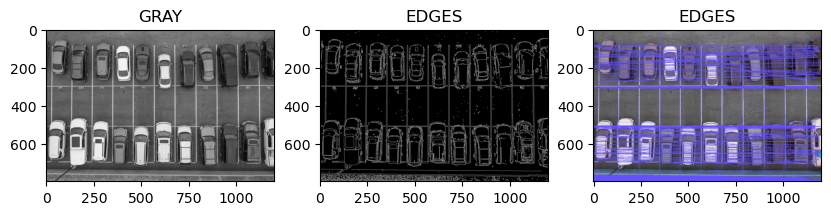

In [13]:
#202331004 Moh Fahrul Gibran
fig, axs = plt.subplots(1,3, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(img_gray,cmap='gray')
ax[0].set_title("GRAY")

ax[1].imshow(edges,cmap='gray')
ax[1].set_title("EDGES")

ax[2].imshow(img_line,cmap='gray')
ax[2].set_title("EDGES")

In [15]:
#202331004 Moh Fahrul Gibran
img_jet = cv2.imread('gambar makanan.png')
rows, cols, _=img_jet.shape
print('img shape: ', img_jet.shape)

img shape:  (183, 275, 3)


# Cara 1


Text(0.5, 1.0, 'resize img')

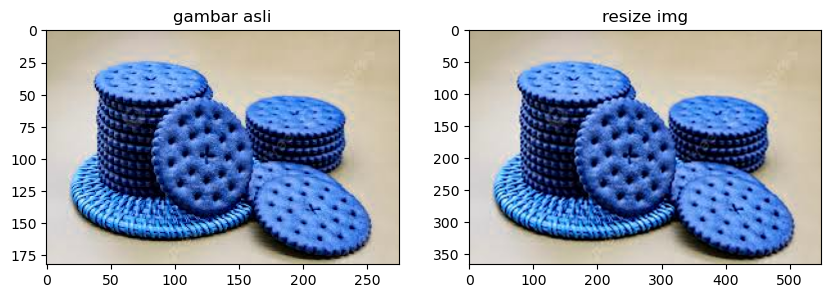

In [16]:
#202331004 Moh Fahrul Gibran
res = cv2.resize(img_jet, None, fx=2, fy=2,
                 interpolation=cv2.INTER_CUBIC)
fig,axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_jet)
ax[0].set_title('gambar asli')

ax[1].imshow(res)
ax[1].set_title('resize img')

# Cara 2

Text(0.5, 1.0, 'resize img')

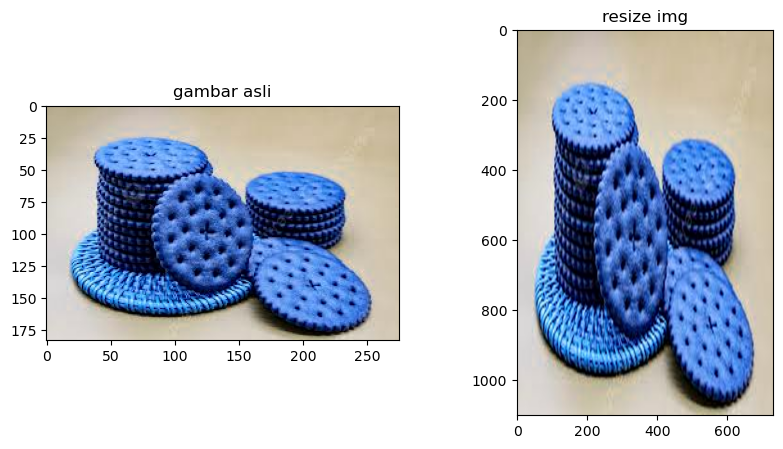

In [17]:
#202331004 Moh Fahrul Gibran
tinggi, lebar = img_jet.shape[:2]
res2 = cv2.resize(img_jet, (4*tinggi, 4*lebar),
                  interpolation=cv2.INTER_CUBIC)
fig,axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_jet)
ax[0].set_title('gambar asli')

ax[1].imshow(res2)
ax[1].set_title('resize img')

# perputaran citra / rotasi gambar


In [19]:
#202331004 Moh Fahrul Gibran
img_ajg = cv2.imread('gambar makanan.png',0)
rows, cols=img_ajg.shape
print('img shape: ', img_ajg.shape)

img shape:  (183, 275)


# Cara 1

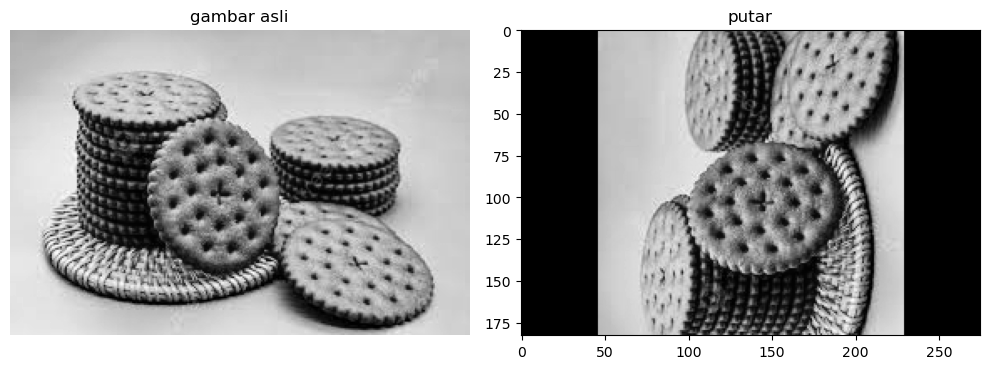

<Figure size 640x480 with 0 Axes>

In [20]:
#202331004 Moh Fahrul Gibran
M = cv2.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0),90,1)

img_putar = cv2.warpAffine(img_ajg, M, (cols, rows))

fig,axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_ajg, cmap='gray')
ax[0].set_title('gambar asli')

ax[1].imshow(img_putar, cmap='gray')
ax[1].set_title('putar')

for a in axs:
    a.axis('off')

    plt.tight_layout()
    plt.show()

# Cara 2

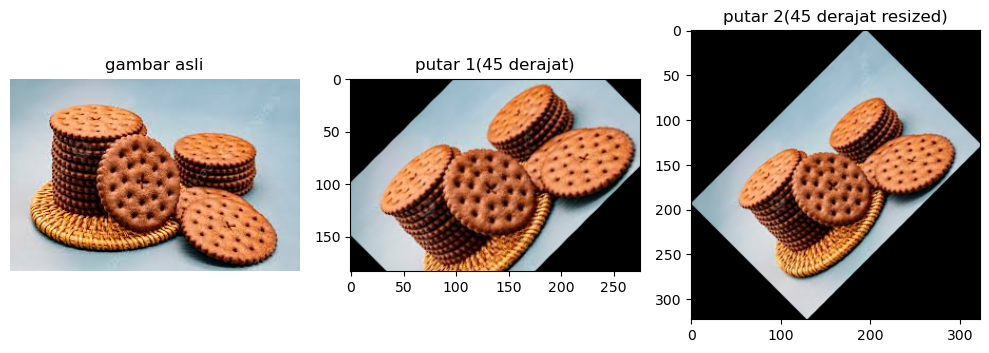

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [22]:
#202331004 Moh Fahrul Gibran
from skimage import io, transform

img_ajg2 = io.imread('gambar makanan.png')

rotated = transform.rotate(img_ajg2, 45, resize=False)
rotated2 = transform.rotate(img_ajg2, 45, resize=True)

fig,axs = plt.subplots(1,3, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_ajg2, cmap='gray')
ax[0].set_title('gambar asli')

ax[1].imshow(rotated, cmap='gray')
ax[1].set_title('putar 1(45 derajat)')

ax[2].imshow(rotated2, cmap='gray')
ax[2].set_title('putar 2(45 derajat resized)')

for a in axs:
    a.axis('off')

    plt.tight_layout()
    plt.show()

# Pengaplikasian

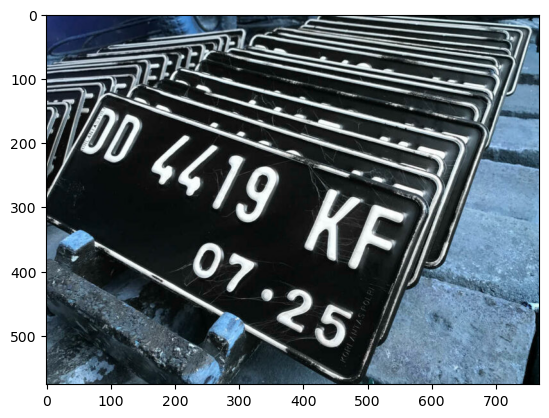

In [48]:
t = cv2.imread('plat.jpg')
output_shape = (80, 400) 
plt.imshow(t)


<function matplotlib.pyplot.show(close=None, block=None)>

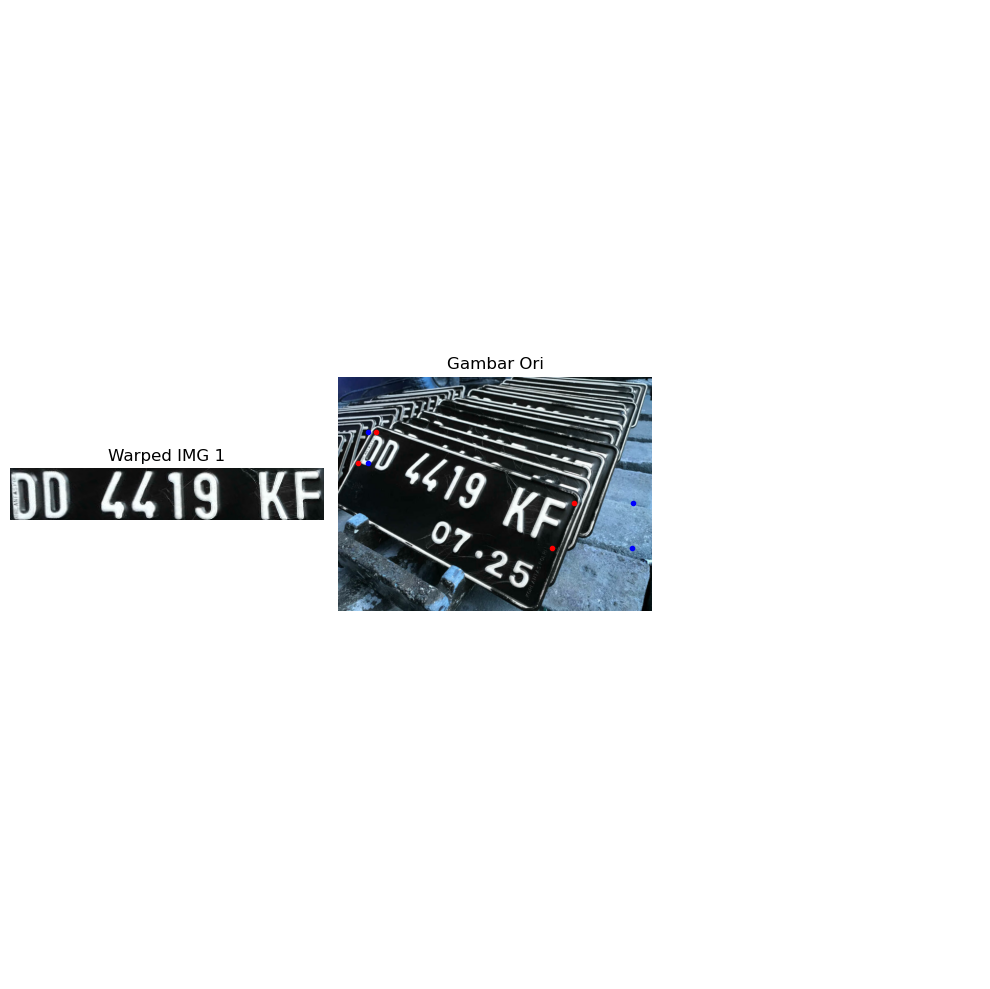

In [51]:
from skimage import io, transform
src = np.array([
    [0,0],
    [0,50],
    [300,50],
    [300,0]
])

crp = np.array([
    [92,136],
    [47,211],
    [524,419],
    [576,309]
])



tform = transform.ProjectiveTransform()
tform.estimate(src, crp)

tform2 = transform.ProjectiveTransform()
tform2.estimate(src, crp2)

warped = transform.warp(t, tform, output_shape=(50,300))
warped2 = transform.warp(t, tform2, output_shape=(50,300))

fig, axs = plt.subplots(1,3,figsize = (10,10))
axs = axs.ravel()

axs[0].imshow(warped)
axs[0].set_title("Warped IMG 1")

axs[1].imshow(t)
axs[1].plot(crp[:,0], crp[:,1], '.r')
axs[1].plot(crp2[:,0], crp[:,1], '.b')
axs[1].set_title("Gambar Ori")



for a in axs:
    a.axis('off')
    
plt.tight_layout()
plt.show